<a href="https://colab.research.google.com/github/AtifRonan2843/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
cancer=pd.read_csv("/content/survey lung cancer.csv")
cancer.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


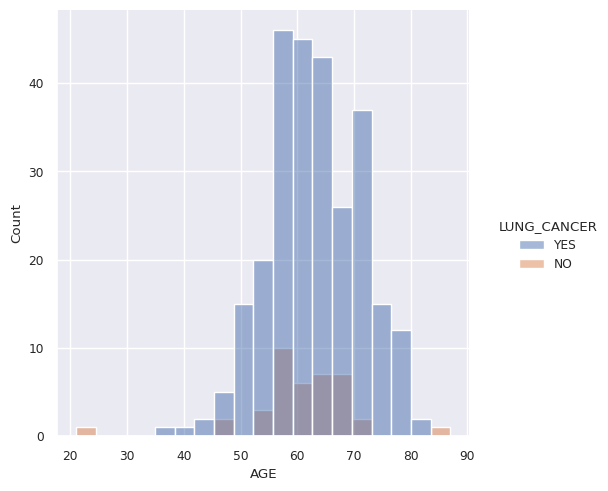

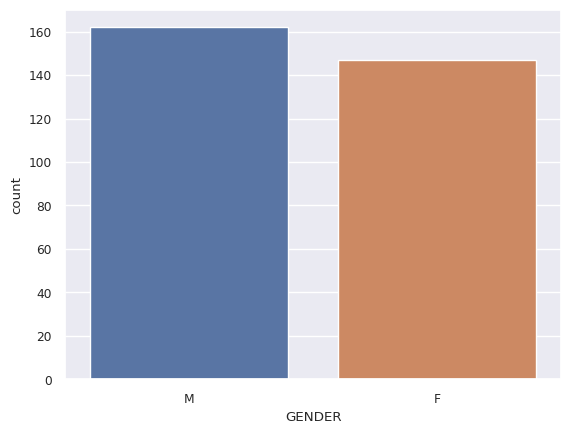

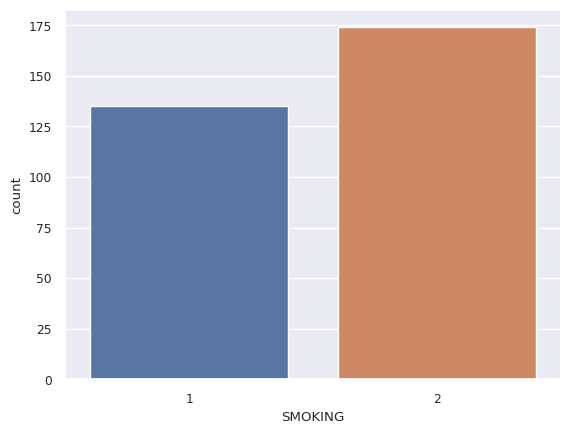

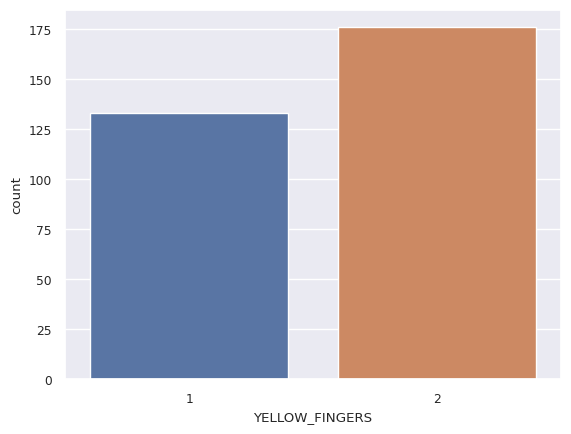

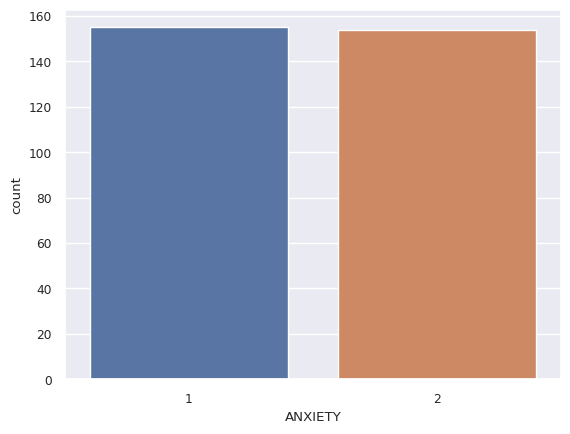

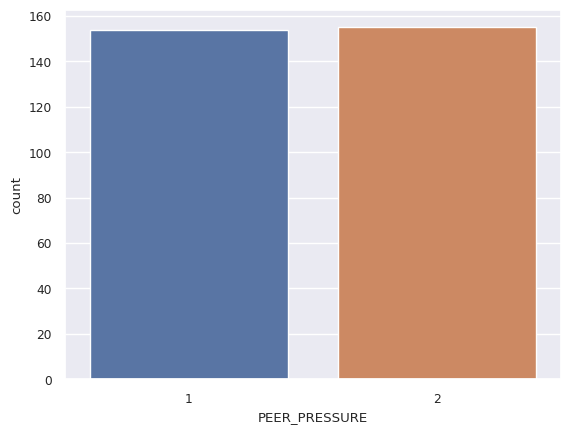

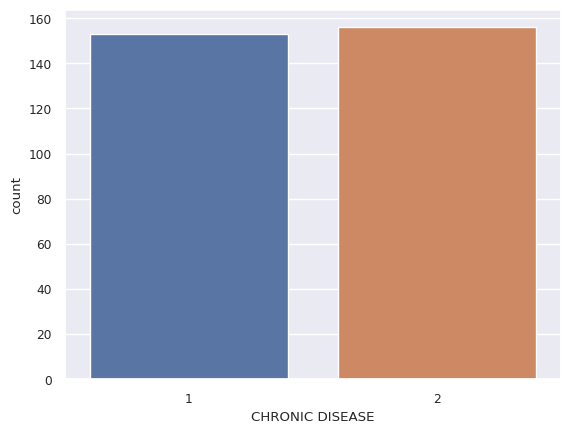

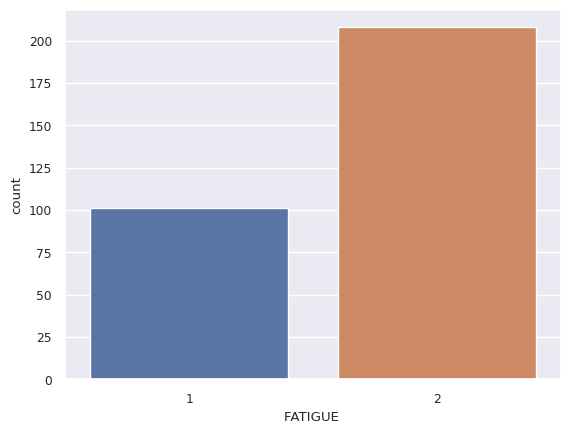

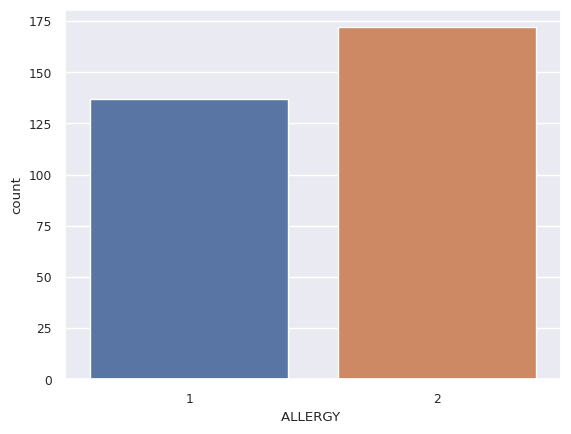

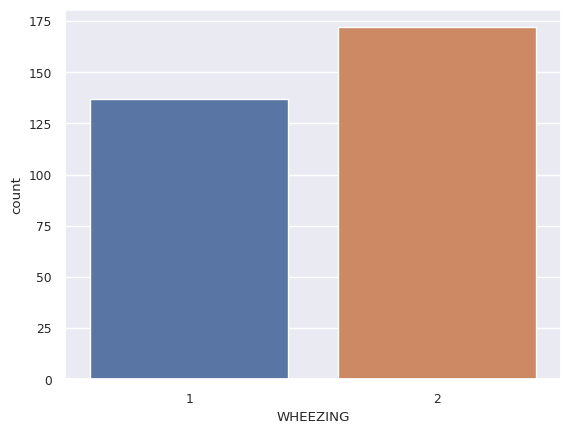

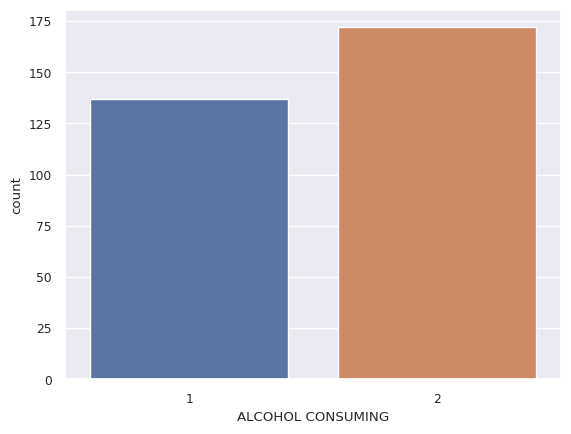

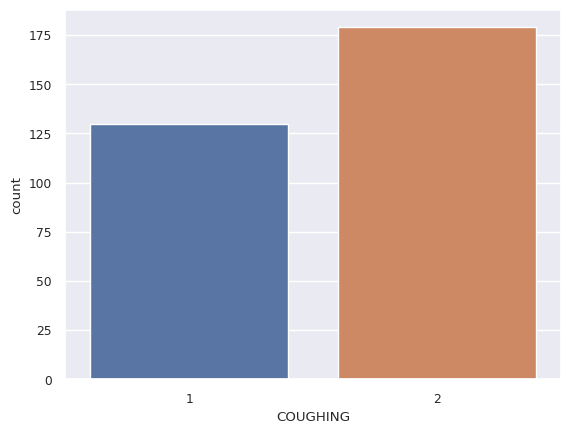

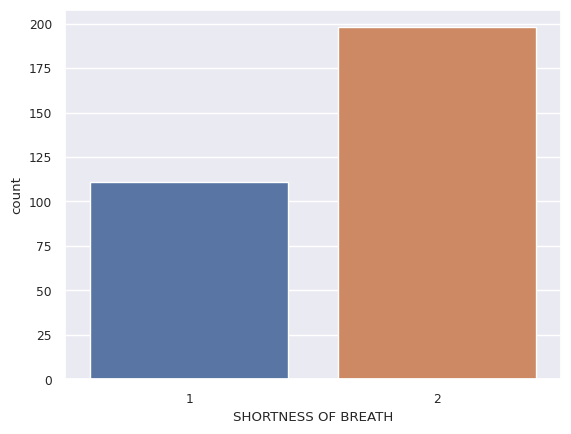

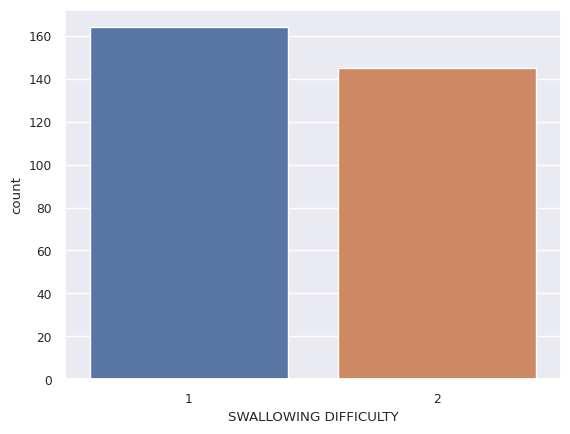

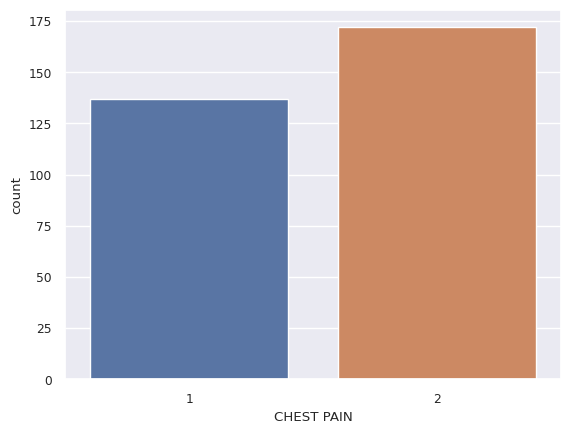

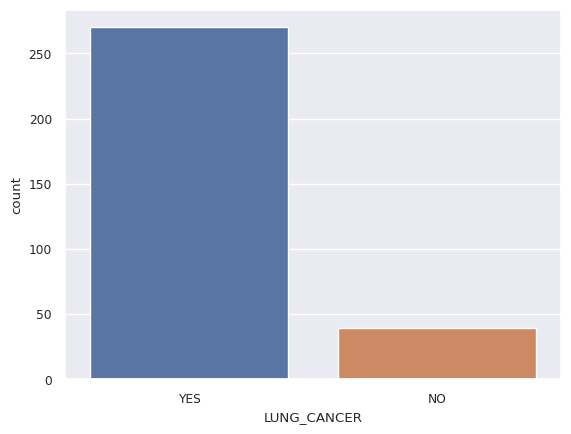

In [ ]:
sns.displot(data=cancer,x=cancer['AGE'],hue='LUNG_CANCER')
plt.show()
cat_col=cancer.drop(["AGE"],axis=1).columns
for i in cat_col:
	sns.countplot(x = cancer[i])
	plt.show()

DATA PREPROCESSING

In [ ]:
cancer.shape
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
col=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
for i in col:
  print(f"Number of rows with null values in {i} column: ", cancer[i].isnull().sum())
  cancer= cancer[cancer[i].notnull()]
print("Shape after removing null values: ", cancer.shape)

Number of rows with null values in GENDER column:  0
Number of rows with null values in AGE column:  0
Number of rows with null values in SMOKING column:  0
Number of rows with null values in YELLOW_FINGERS column:  0
Number of rows with null values in ANXIETY column:  0
Number of rows with null values in PEER_PRESSURE column:  0
Number of rows with null values in CHRONIC DISEASE column:  0
Number of rows with null values in FATIGUE  column:  0
Number of rows with null values in ALLERGY  column:  0
Number of rows with null values in WHEEZING column:  0
Number of rows with null values in ALCOHOL CONSUMING column:  0
Number of rows with null values in COUGHING column:  0
Number of rows with null values in SHORTNESS OF BREATH column:  0
Number of rows with null values in SWALLOWING DIFFICULTY column:  0
Number of rows with null values in CHEST PAIN column:  0
Number of rows with null values in LUNG_CANCER column:  0
Shape after removing null values:  (309, 16)


In [ ]:
cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in cancer.columns:
    cancer[column] = cancer[column].replace({1: 0, 2: 1})
enc=LabelEncoder()
cancer["GENDER"]= enc.fit_transform(cancer["GENDER"])
cancer["LUNG_CANCER"]= enc.fit_transform(cancer["LUNG_CANCER"])
cancer.head()#ask atif


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
cancer_corr=cancer.corr()
cancer_corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


<Axes: title={'center': 'Correlation Matrix\n'}>

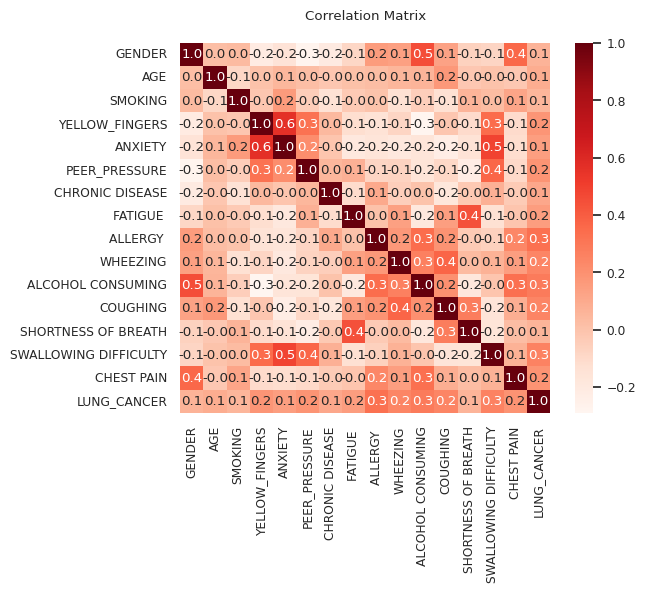

In [ ]:
plt.title("Correlation Matrix\n")
#sns.heatmap(cancer_corr, cmap = 'Reds')
sns.heatmap(cancer_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<Axes: title={'center': 'Correlation Matrix\n'}>

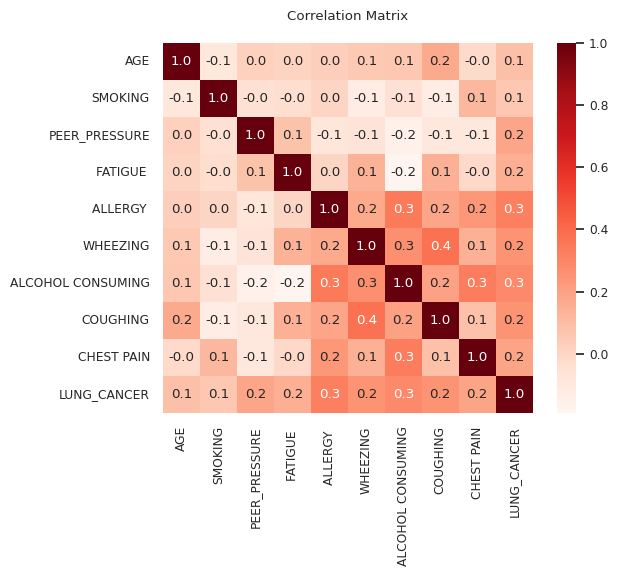

In [ ]:
cancer=cancer.drop(['GENDER','SWALLOWING DIFFICULTY','YELLOW_FINGERS','SHORTNESS OF BREATH','CHRONIC DISEASE','ANXIETY'],axis=1)
cancer_corr=cancer.corr()
plt.title("Correlation Matrix\n")
#sns.heatmap(cancer_corr, cmap = 'Reds')
sns.heatmap(cancer_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [ ]:

x=cancer.drop(['LUNG_CANCER'],axis=1)
y=cancer['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=0,stratify=y)#look into it

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[0.51515152 1.         0.         ... 0.         0.         1.        ]
 [0.53030303 0.         1.         ... 1.         1.         0.        ]
 [0.60606061 0.         1.         ... 0.         1.         0.        ]
 ...
 [0.77272727 1.         0.         ... 1.         1.         1.        ]
 [0.46969697 1.         0.         ... 1.         1.         1.        ]
 [0.77272727 1.         1.         ... 0.         1.         1.        ]]


LOGISTIC REGRESSION





In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100000)
log.fit(X_train, y_train)
prediction=log.predict(X_test)
accuracy=accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [ ]:
print(f'Accuracy: {accuracy*100:.2f}')
print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")

Accuracy: 92.47
Precision: 92.05
Recall: 100.00


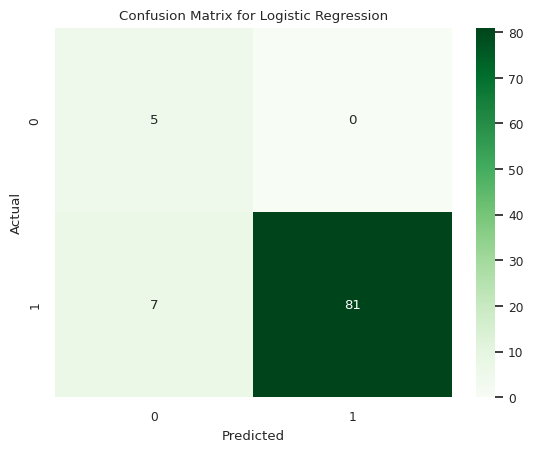

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(prediction, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])#understand
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

NUERAL NETWORKS

In [ ]:
##Neural Networks
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nn.fit(X_train, y_train)
prediction1=nn.predict(X_test)
accuracy1=accuracy_score(y_test, prediction1)
precision1 = precision_score(y_test, prediction1)
recall1 = recall_score(y_test, prediction1)

In [ ]:
print(f'Accuracy: {accuracy1*100:.2f}')
print(f"Precision: {precision1*100:.2f}")
print(f"Recall: {recall1*100:.2f}")

Accuracy: 92.47
Precision: 92.05
Recall: 100.00


In [ ]:
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


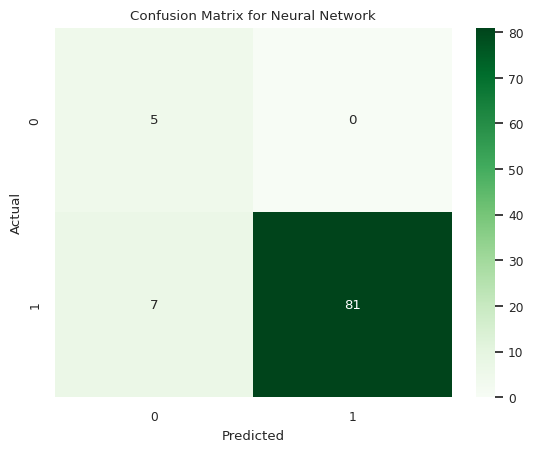

In [ ]:
from sklearn.metrics import confusion_matrix
mat1=confusion_matrix(prediction1, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat1, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()

ENSEMBLE RANDOMFOREST


In [ ]:

from sklearn.ensemble import RandomForestClassifier
dec_tree = RandomForestClassifier(n_estimators=100)
dec_tree.fit(X_train, y_train)
prediction2=dec_tree.predict(X_test)
accuracy2=accuracy_score(y_test, prediction2)
precision = precision_score(y_test, prediction2)
recall = recall_score(y_test, prediction2)

In [ ]:
print(f'Accuracy: {accuracy*100:.2f}')
print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")

Accuracy: 92.47
Precision: 92.86
Recall: 96.30


In [ ]:
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


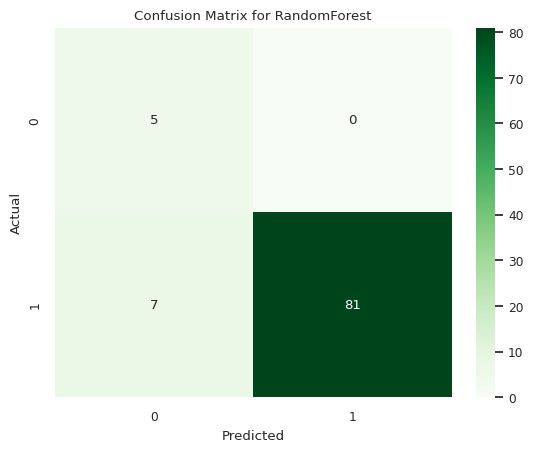

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(prediction, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RandomForest")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
accuracy3=accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [ ]:
print(f'Accuracy: {accuracy*100:.2f}')
print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")

Accuracy: 92.47
Precision: 93.98
Recall: 96.30


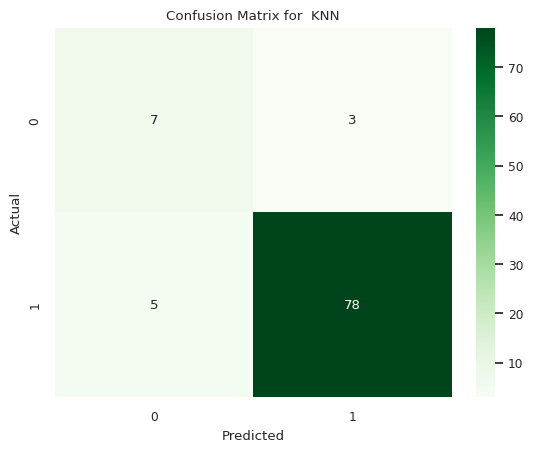

In [ ]:
from sklearn.metrics import confusion_matrix
cmatrix=confusion_matrix(prediction, y_test)

sns.set(font_scale=0.8)
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for  KNN")
plt.show()

In [ ]:
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
